# Validação de Dados com Pydantic

O Pydantic é uma biblioteca de análise de dados e validação para Python, baseada em **type hints**

Diferente de outras bibliotecas que apenas verificam se um dado é de um tipo específico, o Pydantic garante que os dados estejam no formato correto, convertendo-os se necessário (**parsing**). Se os dados não forem válidos, ele gera erros detalhados e fáceis de ler.

Agora os livros vão ser objetos e vamos usar o Pydantic para validar a estrutura dos campos de instância.

In [11]:
class Book:
    id: int
    title: str
    author: str
    description: str
    rating: int

    def __init__(self, id, title, author, description, rating):
        self.id = id
        self.title = title
        self.author = author
        self.description = description
        self.rating = rating

Assim, criamos nossa lista de livros passando os atributos de instância:

In [12]:
BOOKS = [
    Book(1, 'Computer Science Pro', 'Code', 'A very nice book', 5),
    Book(2, 'Be FastAPI', 'Code', 'A great book', 5),
    Book(3, 'Master Endpoints', 'Code', 'A awesome book', 5),
    Book(4, 'HP1', 'Author 01', 'Book description 1', 5),
    Book(5, 'HP2', 'Author 02', 'Book description 2', 5),
    Book(6, 'HP3', 'Author 03', 'Book description 3', 5),
]

Portanto, nosso endpoint ficará como:

In [13]:
from fastapi import FastAPI, Body

app = FastAPI()

@app.post('/create-book')
async def create_book(book_request=Body()):
    BOOKS.append(book_request)

Desse jeito nosso endpoint ficará assim:

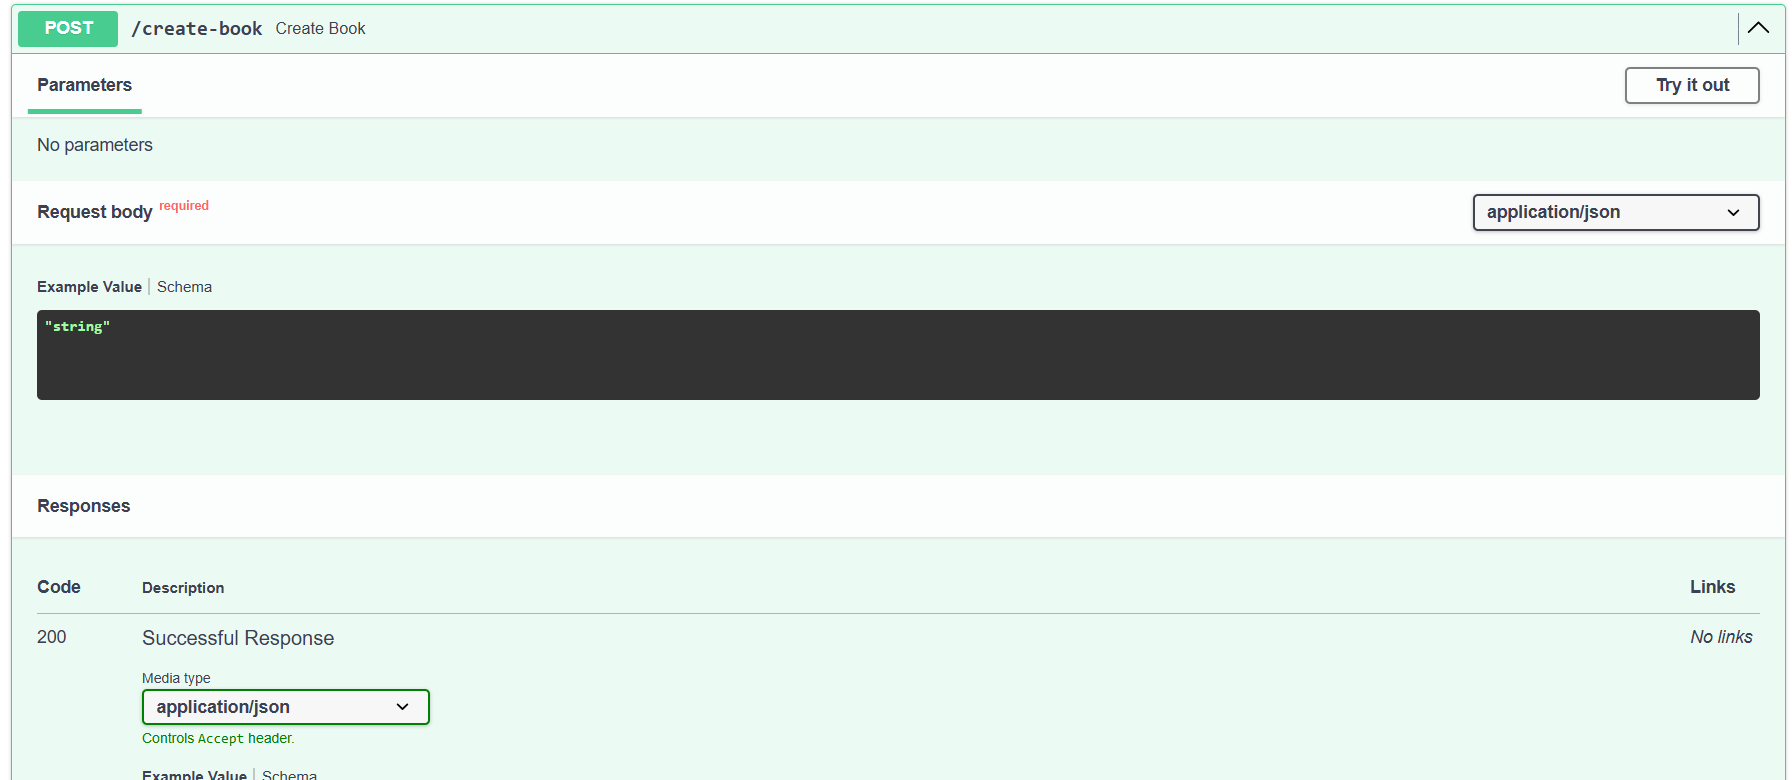

Perceba que não temos uma estrutura esperada no **Example Value**

### Vamos criar uma classe para validação de estrutura da requisição usando o Pydantic:

In [14]:
from pydantic import BaseModel

class BookRequest(BaseModel):
    id: int
    title: str
    author: str
    description: str
    rating: int

Isso muda a forma como estruturamos nosso endpoint. Agora nossa requisição será tipada como um objeto **BookRequest** e vamos passar para instanciar um novo livro a partir da classe **Book**:

In [17]:
@app.get('/create-book')
async def create_book(book_request: BookRequest):
    new_book = Book(**book_request.model_dump())
    BOOK.append(new_book)

Dessa forma, nosso endpoint ficará assim:

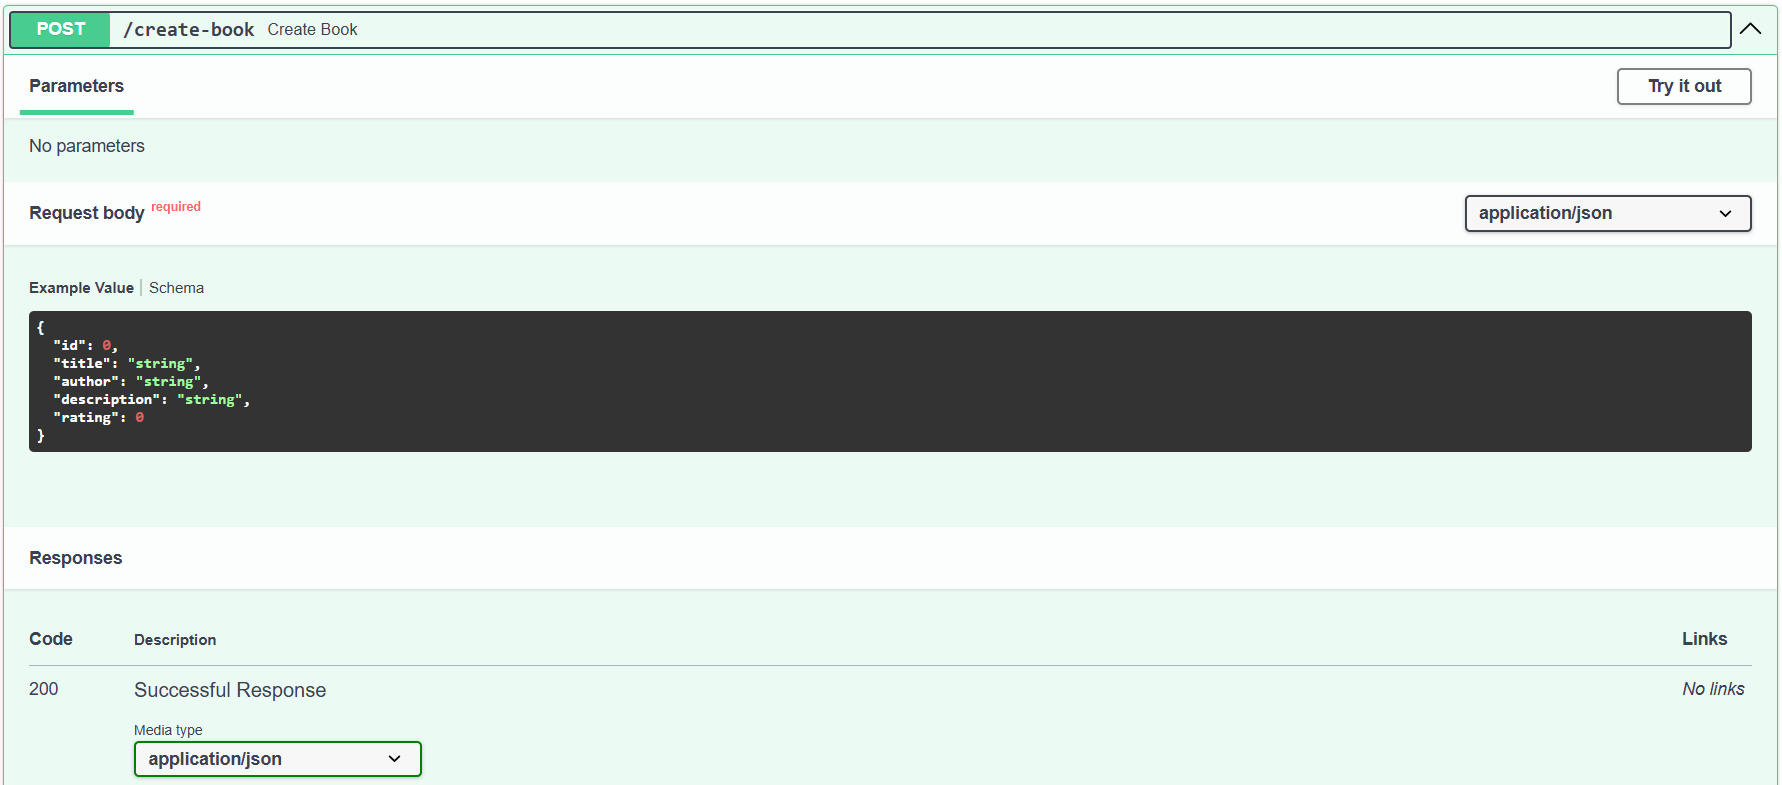

### Assim, teremos os parâmetros tipados como:

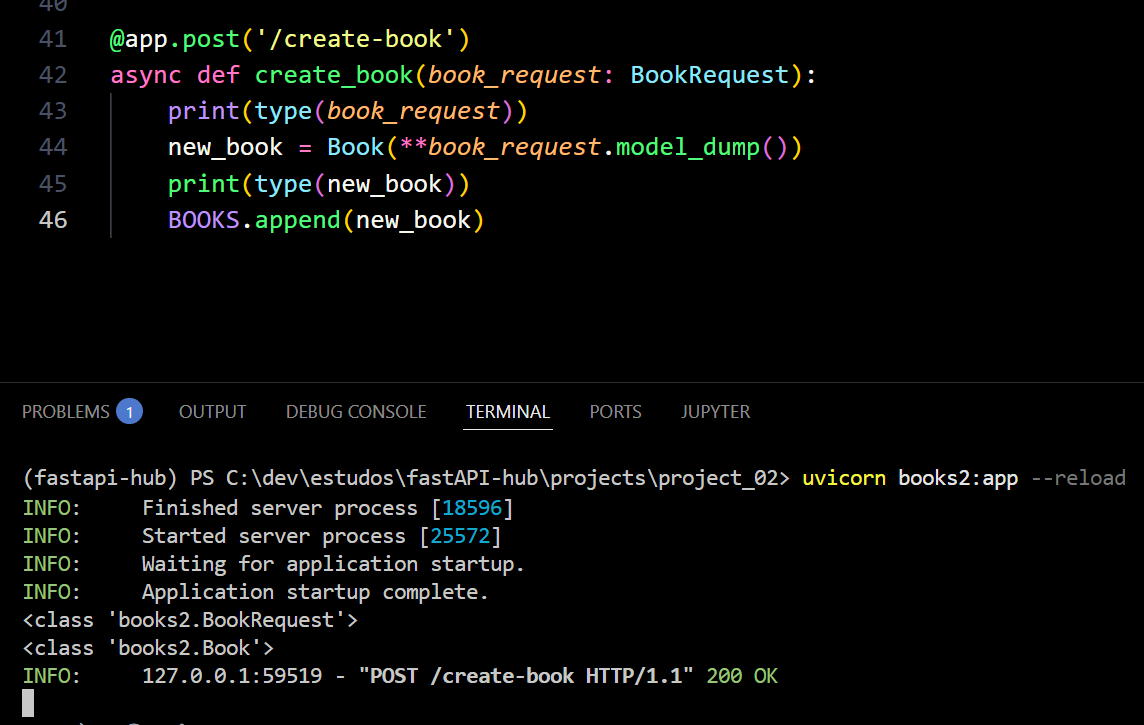